In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("dataset2.csv")
df.head()

,Observation,wage,logWage,female,age,educ,parttime
0,1,66,4.190,0,49,1,1
1,2,34,3.526,1,42,1,1
2,3,70,4.248,1,42,1,1
3,4,47,3.850,0,38,1,0
4,5,107,4.673,1,54,1,1


Exploratory Analysis 

In [3]:
df.describe()

,Observation,wage,logWage,female,age,educ,parttime
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,114.900000,4.641404,0.368000,40.010000,2.078000,0.288000
std,144.481833,55.156055,0.448909,0.482744,10.834236,1.057427,0.453285
min,1.000000,32.000000,3.466000,0.000000,20.000000,1.000000,0.000000
25%,125.750000,72.000000,4.277000,0.000000,32.000000,1.000000,0.000000
50%,250.500000,100.000000,4.605000,0.000000,39.000000,2.000000,0.000000
75%,375.250000,144.000000,4.970000,1.000000,47.000000,3.000000,1.000000
max,500.000000,384.000000,5.951000,1.000000,70.000000,4.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Observation  500 non-null    int64  
 1   wage         500 non-null    int64  
 2   logWage      500 non-null    float64
 3   female       500 non-null    int64  
 4   age          500 non-null    int64  
 5   educ         500 non-null    int64  
 6   parttime     500 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.5 KB


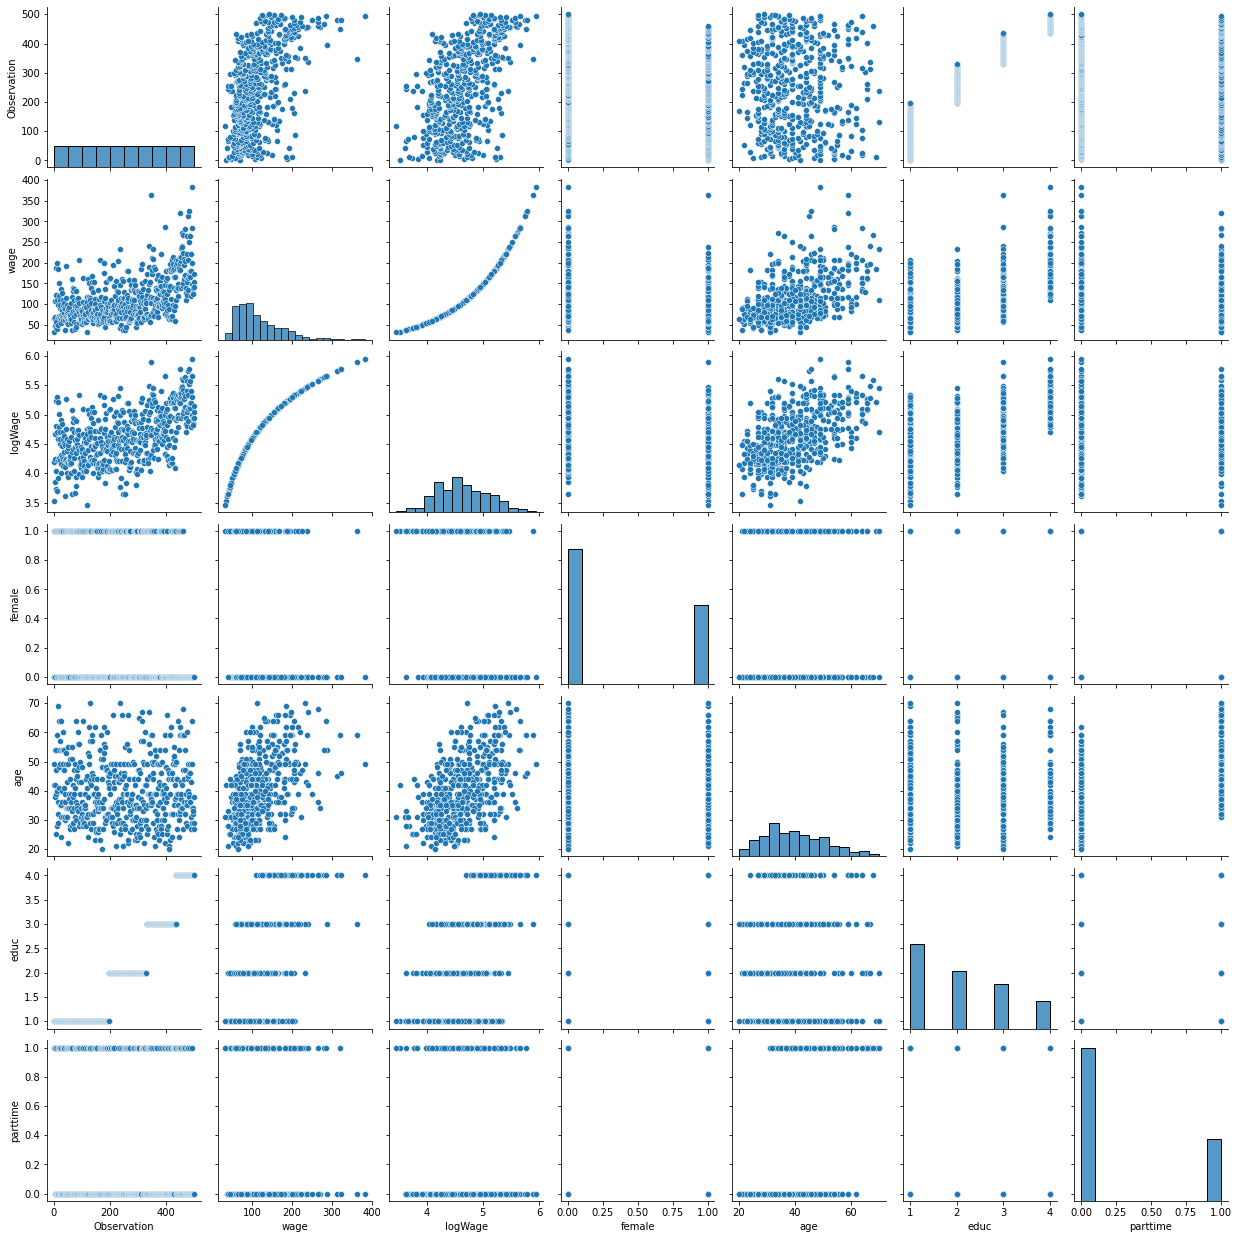

In [5]:
import seaborn as sns 
sns.pairplot(df)

<AxesSubplot:>

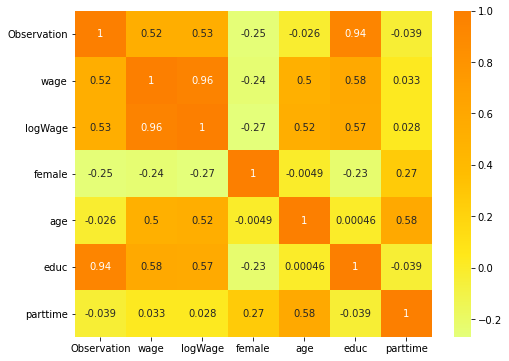

In [6]:
plt.figure(figsize=(8,6))
correlation = df.corr()
sns.heatmap(correlation, cmap = 'Wistia', annot= True)

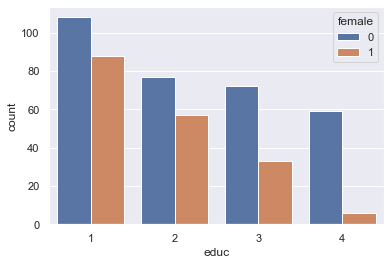

In [7]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="educ", hue="female", data=df)

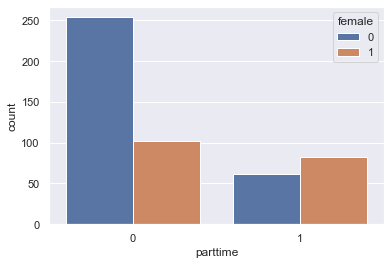

In [8]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="parttime", hue="female", data=df)

The countplot above shows that females are more in part time jobs than male 

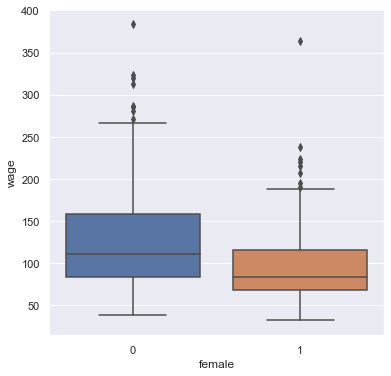

In [9]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="female", y="wage", data=df)
plt.show()

The above boxplot shows the clear wage gap between male and female.Even the median of male and female differs in absolute number 

The boxplot shows that female have on average lower wages than male
Research Questions 
1. How large is the difference ?
2. What are the causes of the difference ?

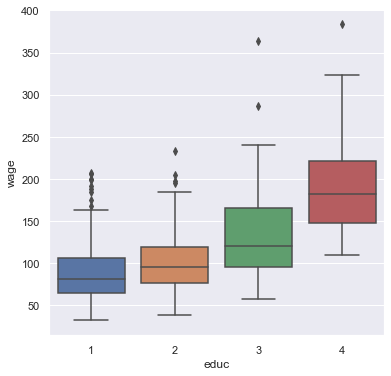

In [10]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="educ", y="wage", data=df)
plt.show()

These box plots show that education is one of the determinant of wages

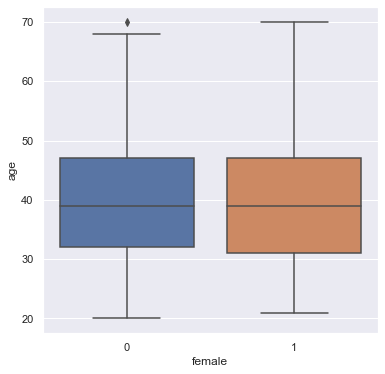

In [11]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(x="female", y="age", data=df)
plt.show()

(array([ 56., 148., 116.,  67.,  40.,  44.,  13.,   7.,   4.,   3.,   0.,
          2.]),
 array([ 32.        ,  61.33333333,  90.66666667, 120.        ,
        149.33333333, 178.66666667, 208.        , 237.33333333,
        266.66666667, 296.        , 325.33333333, 354.66666667,
        384.        ]),
 <BarContainer object of 12 artists>)

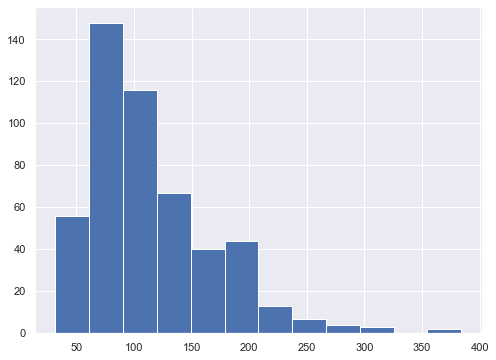

In [12]:
plt.figure(figsize=(8,6))
plt.hist(df["wage"],bins =12)

The histogram shows that wage is skewed towards right 

(array([ 7.,  8., 33., 81., 75., 82., 72., 60., 51., 19.,  7.,  5.]),
 array([3.466     , 3.67308333, 3.88016667, 4.08725   , 4.29433333,
        4.50141667, 4.7085    , 4.91558333, 5.12266667, 5.32975   ,
        5.53683333, 5.74391667, 5.951     ]),
 <BarContainer object of 12 artists>)

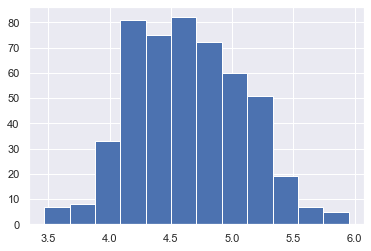

In [13]:
plt.hist(df["logWage"],bins =12)

Research Questions
1. What is total gender difference in wage including differences caused by education ?
2. What is partial gender difference in wage excluding differences caused by education ?

A. In Total gender effect including education effects -Education should be excluded from the model.

B. In Partial gender effect excluding education effects - Education should be included in the model. 

In [14]:
##Running the simple regression model 
import statsmodels.api as sm
model = sm.OLS.from_formula("logWage~female", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logWage   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     39.00
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           9.10e-10
Time:                        20:46:23   Log-Likelihood:                -289.65
No. Observations:                 500   AIC:                             583.3
Df Residuals:                     498   BIC:                             591.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7336      0.024    194.453      0.000       4.686       4.781
female        -0.2506      0.040     -6.245      0.000      -0.329      -0.172
==============================================================================
Omnibus:                        8.330   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.009
Skew:                           0.212   Prob(JB):                       0.0301
Kurtosis:                       2.603   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

OLS= Ordinary Least Square 

Research Question- What is estimated difference in wage due to gender ?

Answer - female earns a wage 22% less than male 



The glm() function fits generalized linear models, a class of models that includes logistic regression. The syntax of the glm() function is similar to that of lm(), except that we must pass in the argument family=sm.families.Binomial() in order to tell python to run a logistic regression rather than some other type of generalized linear model.

In [15]:
##model = sm.GLM.from_formula("wage~female", family=sm.families.Binomial(),data=df)
##result = model.fit()
##result.summary()


In [16]:
model = sm.OLS.from_formula("age~female", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01205
Date:                Wed, 15 Dec 2021   Prob (F-statistic):              0.913
Time:                        20:46:23   Log-Likelihood:                -1900.3
No. Observations:                 500   AIC:                             3805.
Df Residuals:                     498   BIC:                             3813.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     40.0506      0.610     65.648      0.000      38.852      41.249
female        -0.1104      1.006     -0.110      0.913      -2.086       1.865
==============================================================================
Omnibus:                       24.059   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.823
Skew:                           0.536   Prob(JB):                     2.47e-06
Kurtosis:                       2.697   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

interpretation-The age of female is 0.11 years less than male on average 

In [17]:
model = sm.OLS.from_formula("educ~female", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   educ   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     26.59
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           3.63e-07
Time:                        20:46:23   Log-Likelihood:                -723.88
No. Observations:                 500   AIC:                             1452.
Df Residuals:                     498   BIC:                             1460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2595      0.058     38.946      0.000       2.146       2.373
female        -0.4932      0.096     -5.157      0.000      -0.681      -0.305
==============================================================================
Omnibus:                      144.446   Durbin-Watson:                   0.108
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.913
Skew:                           0.391   Prob(JB):                     1.59e-08
Kurtosis:                       1.945   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation- The education among female is 0.49 less than male 

In [18]:
model = sm.OLS.from_formula("parttime~female", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               parttime   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     37.82
Date:                Wed, 15 Dec 2021   Prob (F-statistic):           1.60e-09
Time:                        20:46:23   Log-Likelihood:                -295.05
No. Observations:                 500   AIC:                             594.1
Df Residuals:                     498   BIC:                             602.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1962      0.025      7.973      0.000       0.148       0.245
female         0.2494      0.041      6.149      0.000       0.170       0.329
==============================================================================
Omnibus:                      111.117   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.845
Skew:                           0.847   Prob(JB):                     2.06e-17
Kurtosis:                       2.094   Cond. No.                         2.42
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation- Parttime job among female is more than male. It varies by the coefficient of 0.2494

Partial Effect- If all other variables remain fixed 

Research question- What is partial gender effect on wage 

Also read as how does wage varies when all other variables remain fixed 

Hint - To answer this question you will require the multiple regression 

In [19]:
model = sm.OLS.from_formula("logWage~female+age+educ+parttime", data=df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                logWage   R-squared:                       0.704
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     294.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.51e-129
Time:                        20:46:23   Log-Likelihood:                -4.1790
No. Observations:                 500   AIC:                             18.36
Df Residuals:                     495   BIC:                             39.43
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.0527      0.055     55.170      0.000       2.944       3.161
female        -0.0411      0.025     -1.662      0.097      -0.090       0.007
age            0.0306      0.001     24.041      0.000       0.028       0.033
educ           0.2332      0.011     21.873      0.000       0.212       0.254
parttime      -0.3654      0.032    -11.575      0.000      -0.427      -0.303
==============================================================================
Omnibus:                        0.968   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.616   Jarque-Bera (JB):                0.779
Skew:                           0.001   Prob(JB):                        0.677
Kurtosis:                       3.193   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Model Validation 
In order to validate the model we have to check few assumptions of regression 
1. Linear Relationship: In linear regression the relationship between the dependent and independent variable to be linear. This    can be checked by scatter ploting Actual value Vs Predicted value
2. The residual error plot should be normally distributed.
3. The mean of residual error should be 0 or close to 0 as much as possible
4. The linear regression require all variables to be multivariate normal. This assumption can best checked with Q-Q plot.
5. Linear regession assumes that there is little or no Multicollinearity in the data. Multicollinearity occurs when the independent variables are too highly correlated with each other. The variance inflation factor VIF* identifies correlation between independent variables and strength of that correlation.  VIF=1/1−R2 , If VIF >1 & VIF <5 moderate correlation, VIF < 5 critical level of multicollinearity.
6. Homoscedasticity: The data are homoscedastic meaning the residuals are equal across the regression line. We can look at residual Vs fitted value scatter plot. If heteroscedastic plot would exhibit a funnel shape pattern.

C:\Users\hp\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Actual Vs Predicted values')

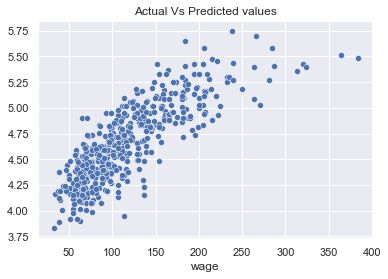

In [20]:
sns.scatterplot(df["wage"],result.fittedvalues,color='b')
plt.title("Actual Vs Predicted values")


The assumption of linearity is reasonable 

C:\Users\hp\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


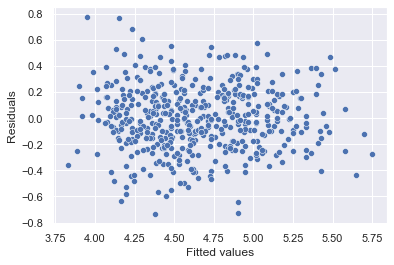

In [21]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

Plotting of the data confirms the heteroscedasticity in the model as variance is not constant. There is considerable variance in the residuals which are plotted against the fitted values 

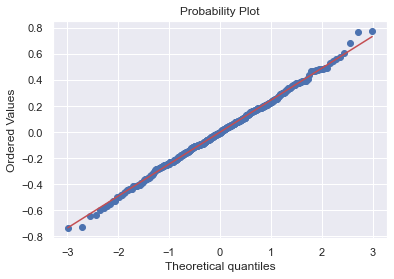

In [22]:
import scipy.stats as stats
stats.probplot(result.resid, dist="norm", plot=plt)
plt.show()

The plot signifies that assumption of normality is not violated as there is little deviation from the line which is incliend at an angle of 45 degree

C:\Users\hp\anaconda3\anaconda\lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'Observation', 'wage' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."
C:\Users\hp\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


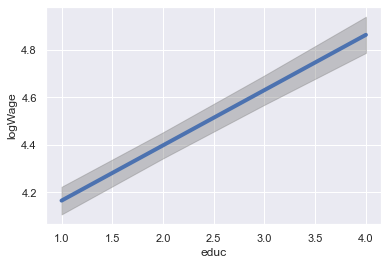

In [23]:
from statsmodels.sandbox.predict_functional import predict_functional
# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = values = {"female": 1, "age": 42, "parttime":1}

pr, cb, fv = predict_functional(result,"educ",values=values,ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("educ")
_ = ax.set_ylabel("logWage")

You can visualize the impact of just one variable education on logWage, here all other variables were kept fixed as the focus variable was only education.

C:\Users\hp\anaconda3\anaconda\lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'Observation', 'wage' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."
C:\Users\hp\anaconda3\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


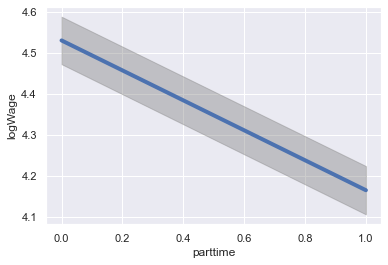

In [24]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = values = {"female": 1, "age": 42, "educ":1}

pr, cb, fv = predict_functional(result,"parttime",values=values,ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("parttime")
_ = ax.set_ylabel("logWage")

The error band is greater hence there is less certainity relationship between logWage and parttime job than relationship between logWage and education 

## Partial residual plot 
A "component plus residual plot" or "partial residual plot" is intended to show how the data would look if all but one covariate could be fixed at reference values. By controlling the values of these covariates, all remaining variation is due either to the "focus variable" (the one variable that is left unfixed, and is plotted on the horizontal axis), or to sources of variation that are unexplained by any of the covariates.


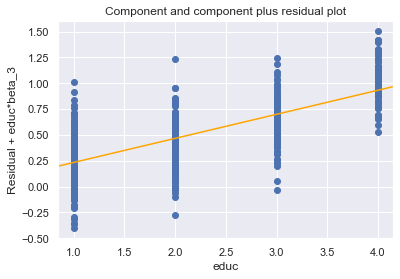

In [25]:
from statsmodels.graphics.regressionplots import plot_ccpr
ax = plt.axes()
plot_ccpr(result, "educ", ax)
##ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency
_ = ax.lines[1].set_color('orange')

The plot above shows how horizontal and vertical axis will be related if gender, parttime and age were fixed. 
For instance graph indicates that when gender , partime and age are fixed the logWage in education criteria 2 varies by 1.50. So the difference along the vertical axis is meaningful. Also you can see the deviation at each education level. it is higher at education level 1 but narrows down at education level 4

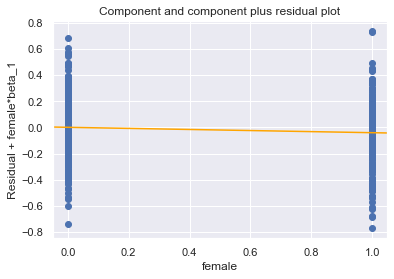

In [26]:
ax = plt.axes()
plot_ccpr(result, "female", ax)
##ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency
_ = ax.lines[1].set_color('orange')

Deviation in both male and female are almost equal when we fix all other variables such as education, age and parttime job

## Added variable plot 
This is a plot that may reveal nonlinearity in the relationship between one covariate and the outcome.

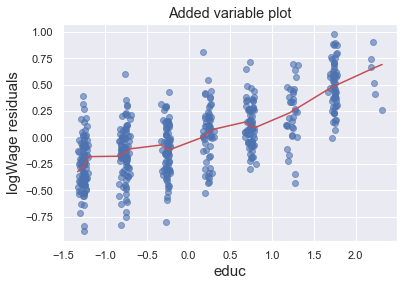

In [27]:
from statsmodels.graphics.regressionplots import add_lowess
model = sm.GLM.from_formula("logWage~female+age+educ+parttime", data=df)
result = model.fit()
result.summary()

fig = result.plot_added_variable("educ")
ax = fig.get_axes()[0]
##ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

occasionally there may be other variables that can affect the response variable that are not of interest to researchers. These variables are known as covariates.Covariates appear most often in two types of settings: ANOVA (analysis of variance) and Regression.

In [28]:
## An alternate model 
model = sm.OLS.from_formula("wage~female+age+educ+parttime", data=df)
result1 = model.fit()
result1.summary()
## You can decide between these two by looking at R- Square 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     264.2
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          2.56e-121
Time:                        20:46:25   Log-Likelihood:                -2428.4
No. Observations:                 500   AIC:                             4867.
Df Residuals:                     495   BIC:                             4888.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -77.8655      7.057    -11.034      0.000     -91.731     -64.000
female        -2.1208      3.151     -0.673      0.501      -8.313       4.071
age            3.6169      0.162     22.277      0.000       3.298       3.936
educ          29.4735      1.360     21.679      0.000      26.802      32.145
parttime     -43.0976      4.026    -10.704      0.000     -51.008     -35.187
==============================================================================
Omnibus:                      106.385   Durbin-Watson:                   1.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              279.619
Skew:                           1.047   Prob(JB):                     1.91e-61
Kurtosis:                       6.006   Cond. No.                         223.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""